# SHAP

In [1]:
import os
# os.chdir("")

In [2]:
#pip install shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

import shap

warnings.filterwarnings('ignore')
np.random.seed = 42

# South African Hearth data set


data = pd.read_csv('heart.csv')
data.head()

C:\Users\malys\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [4]:
na_ratio_cols = data.isna().mean(axis=0)
na_ratio_cols

y = np.array(data['chd'])
data["famhist"]=np.where(data["famhist"]=="Present",1,0)
X = data.drop(['chd'],axis=1)
y

# Szybkie ćwiczenie - wykonaj dowolne kodowanie zmiennej kategorycznej

X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int32  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
dtypes: float64(5), int32(1), int64(3)
memory usage: 30.8 KB


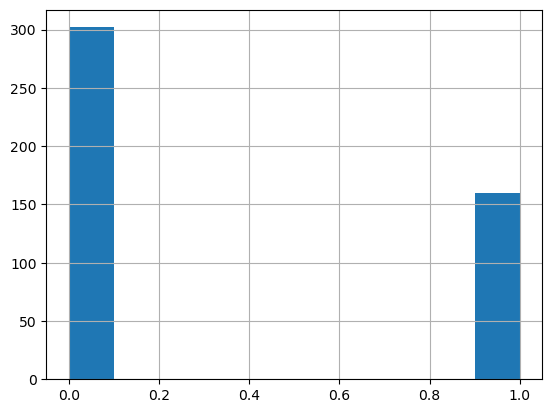

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
# X_val, X_test, y_val, y_test = train_test_split(
#     X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
# )

pd.Series(y).hist()

# pd.Series(y_test).hist()

# pd.Series(y_test).hist()

# print(X.shape,X_train.shape, X_val.shape, X_test.shape)

# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

def gini_roc(y_test, y_pred_proba, tytul):
    
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
    
    plt.plot(fpr,tpr)
    plt.title(tytul)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    roc_auc = metrics.auc(fpr, tpr)
    gini = (2 * roc_auc) - 1

    return gini

def gini_train_val(model, X_train, y_train, X_val, y_val):
    
    y_pred_proba = model.predict_proba(X_train)[::,1]
    gini_train = gini_roc(y_train, y_pred_proba, "ROC Curve for Training Sample")
    print("gini_train: %.4f" % gini_train)
    
    y_pred_proba = model.predict_proba(X_val)[::,1]
    gini_val = gini_roc(y_val, y_pred_proba, "Roc Curve for Validation Sample")
    print("gini_val: %.4f" % gini_val)

    return

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

lr.fit(X_train, y_train)
y_hat = lr.predict(X_val)
print('y:     ' + str(y_hat[0:10]) + '\ny_hat: ' + str(y_val[0:10]))

y:     [0 0 0 0 0 0 1 1 0 0]
y_hat: [0 0 1 0 0 1 0 0 0 0]


Funkcja **shap.partial_dependence_plot** jest używana do wizualizacji wpływu pojedynczej cechy na prognozę modelu, uwzględniając efekty innych cech. Jest to wariant wykresu częściowej zależności (Partial Dependence Plot, PDP), ale z pewnymi modyfikacjami wprowadzonymi przez SHAP.

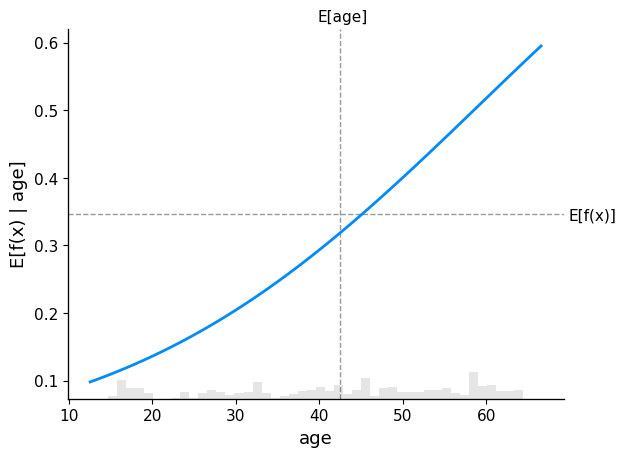

In [7]:
def model_lr_proba(x):
    return lr.predict_proba(x)[:, 1]

def model_lr_log_odds(x):
    p = lr.predict_log_proba(x)
    return p[:,1] - p[:,0]

fig,ax = shap.partial_dependence_plot(
    "age", model_lr_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False
)

Funkcja **shap.summary_plot** jest jednym z kluczowych narzędzi w bibliotece SHAP do wizualizacji wpływu cech na prognozy modelu. Jest to szczególnie przydatne narzędzie do zrozumienia globalnych i lokalnych właściwości modelu.

Funkcja **shap.plots.bar** jest używana do wizualizacji ważności cech w modelu za pomocą wykresu słupkowego. W kontekście SHAP, ważność cechy jest mierzona na podstawie wartości SHAP dla tej cechy w całym zbiorze danych.

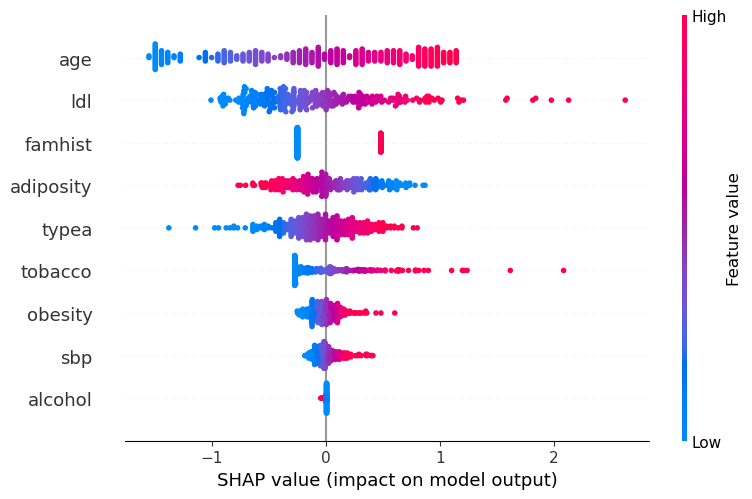

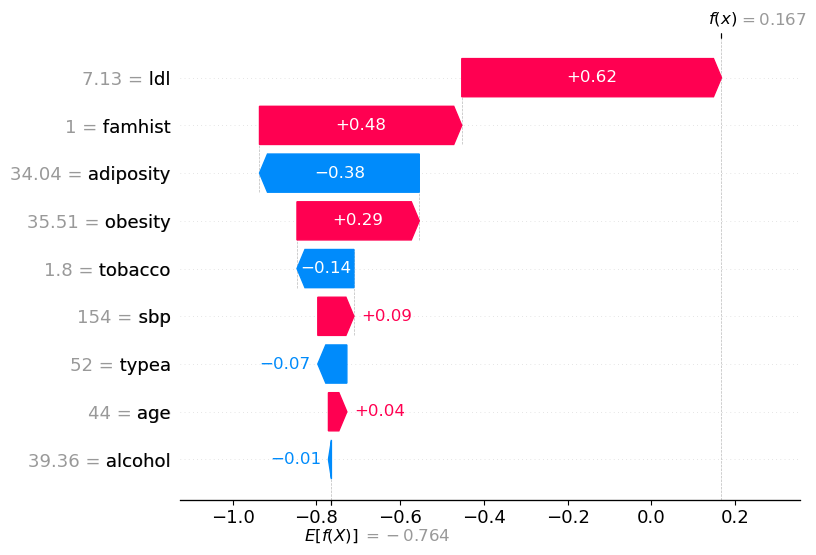

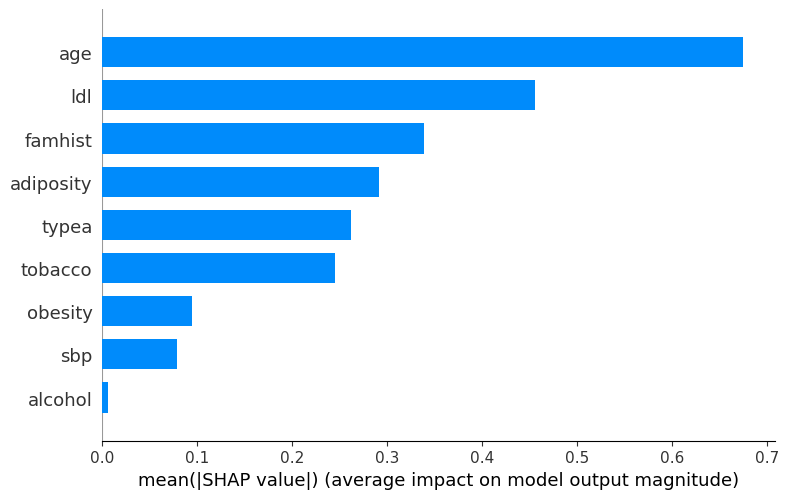

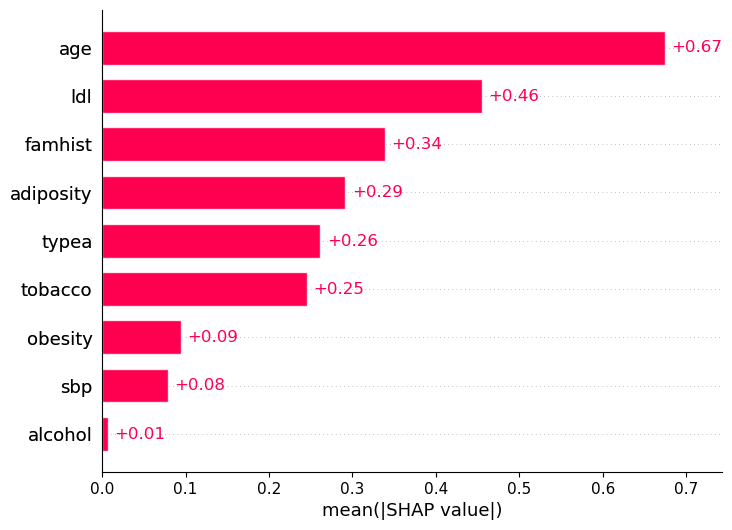

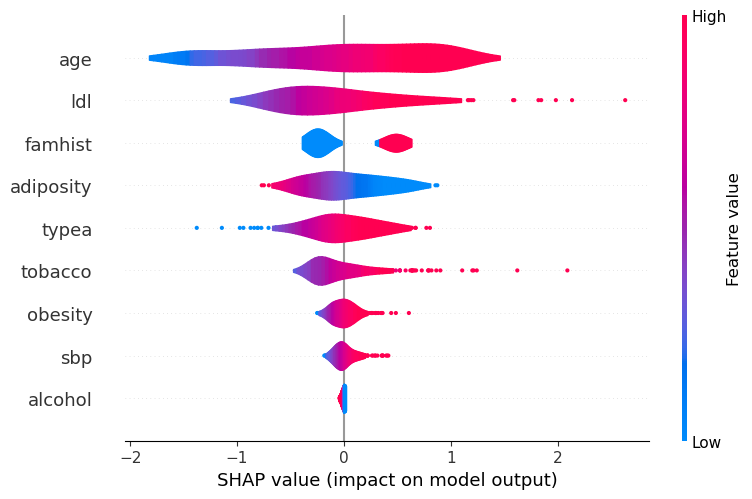

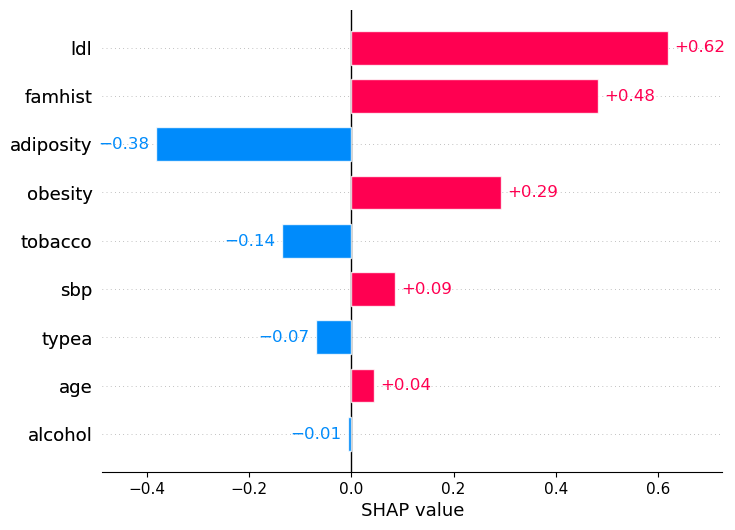

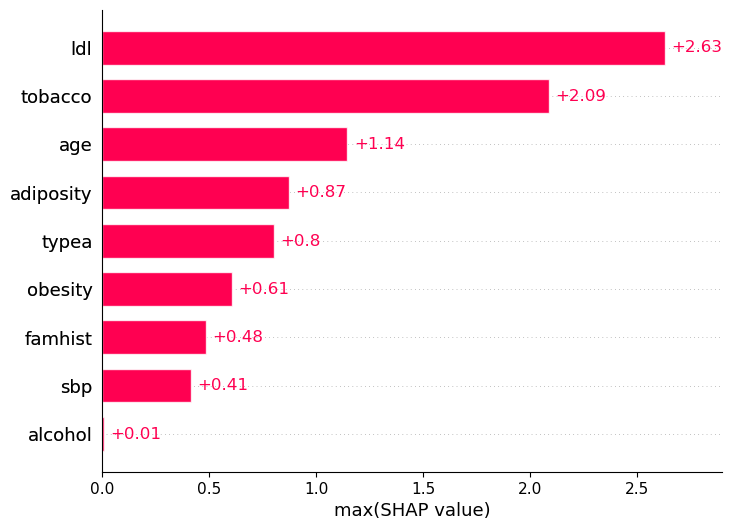

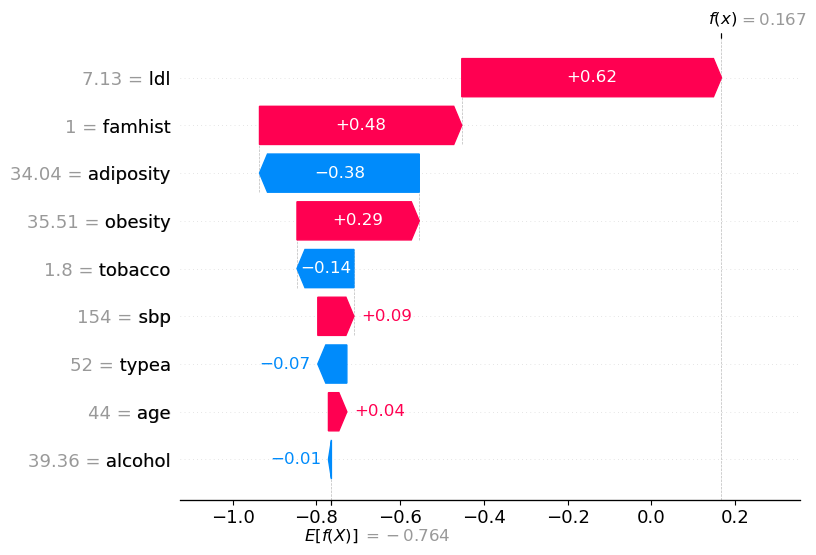

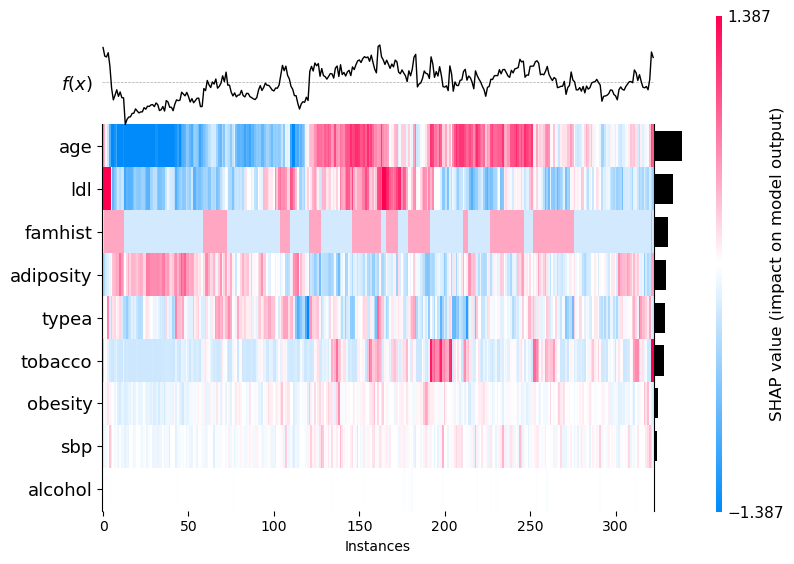

In [8]:
    model = lr    
    explainer = shap.Explainer(model, X_train)
    
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)
    # visualize the first prediction's explanation
    shap.plots.waterfall(shap_values[0])

    # freature importance    
    shap.summary_plot(shap_values, X_train, plot_type="bar")
    
    shap.plots.bar(shap_values)
    shap.summary_plot(shap_values, plot_type='violin')
    shap.plots.bar(shap_values[0])
    shap.plots.bar(shap_values.max(axis=0))

    shap.plots.waterfall(shap_values[0])
    shap.plots.force(shap_values[0])
    
    
    shap.plots.force(shap_values[0])
    
    shap.plots.heatmap(shap_values)

In [9]:
shap.initjs()
shap.plots.force(shap_values[0])


In [10]:
shap.plots.force(shap_values[1])

In [11]:
shap.force_plot(explainer.expected_value, shap_values.values, X_train, feature_names = X_train.columns)

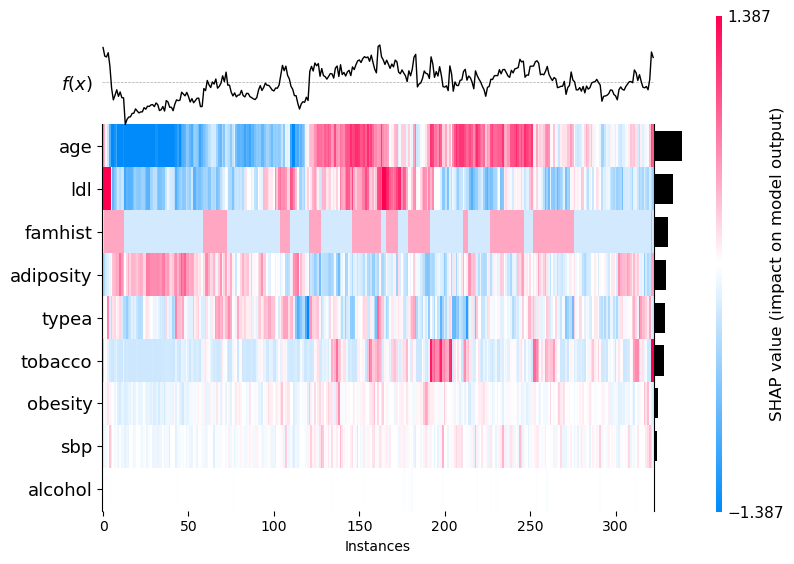

In [12]:
shap.plots.heatmap(shap_values)

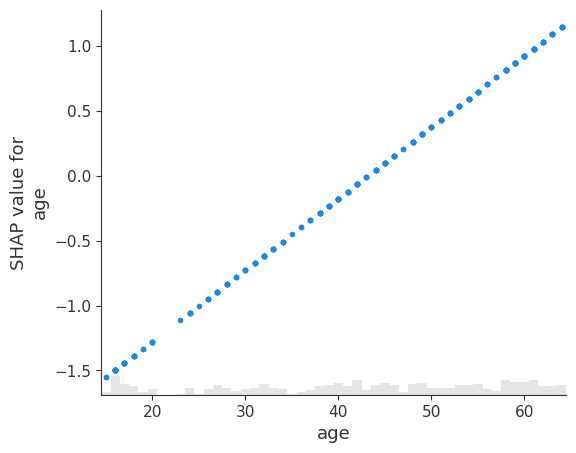

In [13]:
shap.plots.scatter(shap_values[:,"age"])

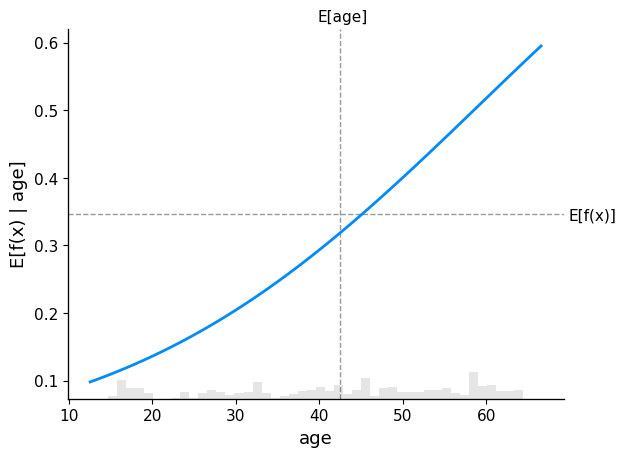

In [14]:
fig, ax = shap.partial_dependence_plot(
    "age", model_lr_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False)


In [15]:
explainer = shap.Explainer(model_lr_proba, X_train)
shap_values = explainer(X_train)

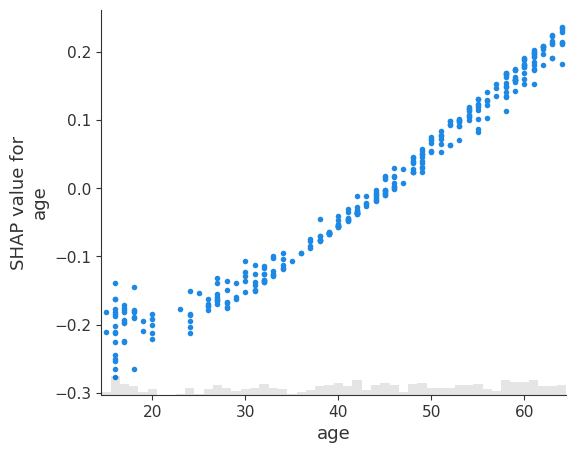

In [16]:
shap.plots.scatter(shap_values[:,"age"])

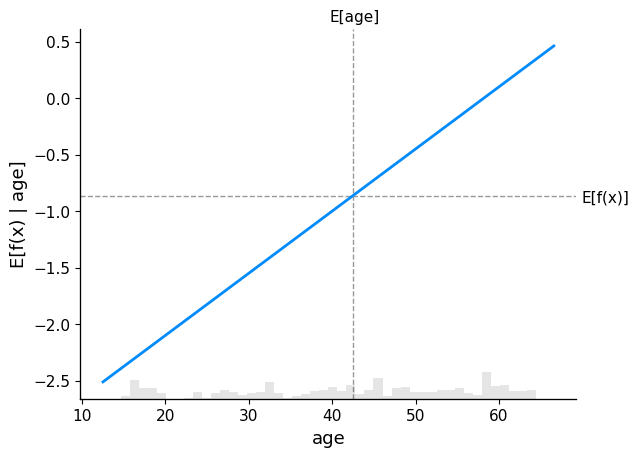

In [17]:
# standardowy Partial  Dependence Plot dla log odds
fig, ax = shap.partial_dependence_plot(
    "age", model_lr_log_odds, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False)


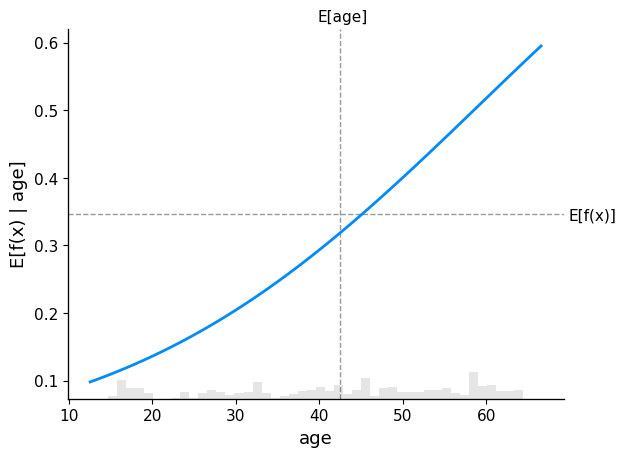

In [18]:
# standardowy Partial  Dependence Plot dla LR
fig, ax = shap.partial_dependence_plot(
    "age", model_lr_proba, X_train, model_expected_value=True,
    feature_expected_value=True, show=False, ice=False)

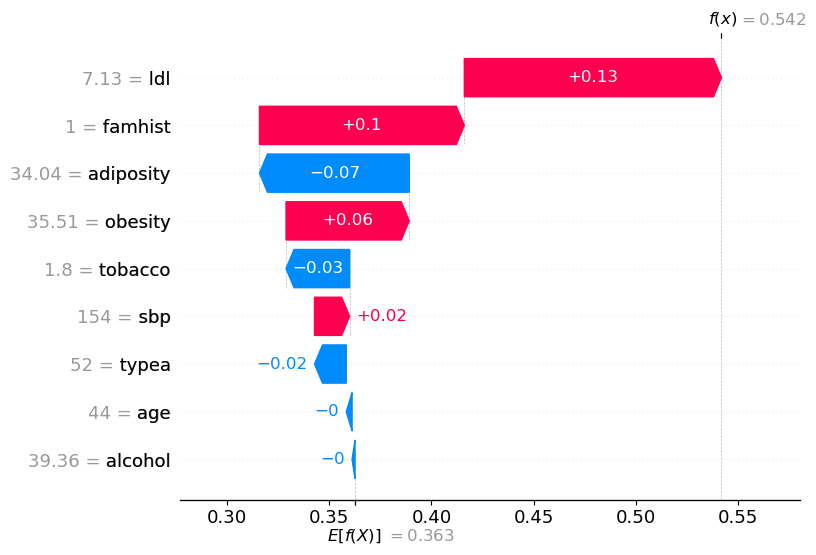

In [19]:
shap.plots.waterfall(shap_values[0])

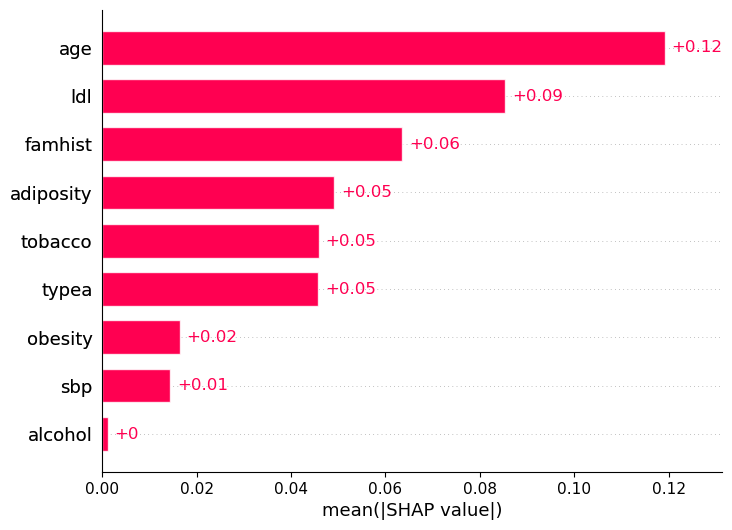

In [20]:
shap.plots.bar(shap_values)

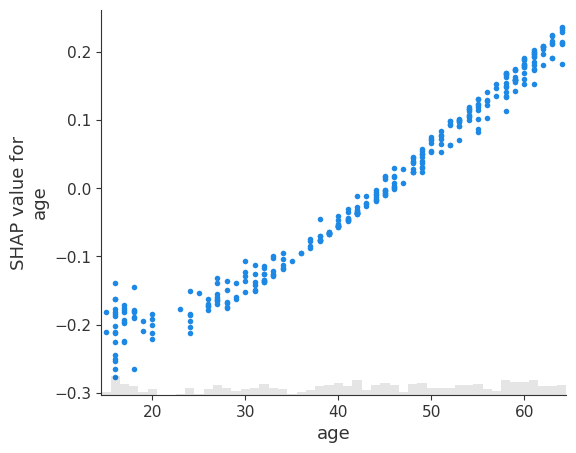

In [21]:
shap.plots.scatter(shap_values[:,"age"])

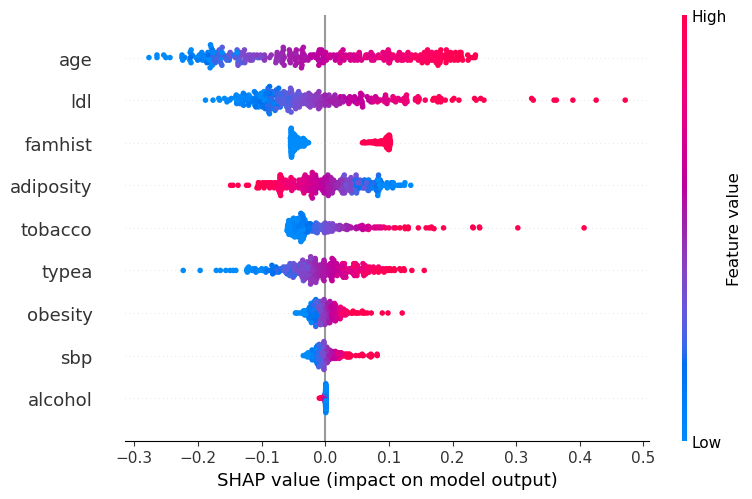

In [22]:
shap.summary_plot(shap_values)

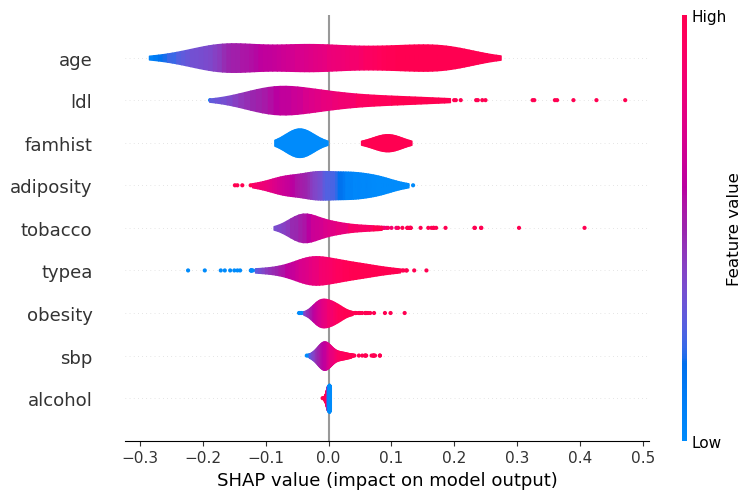

In [23]:
shap.summary_plot(shap_values, plot_type='violin')

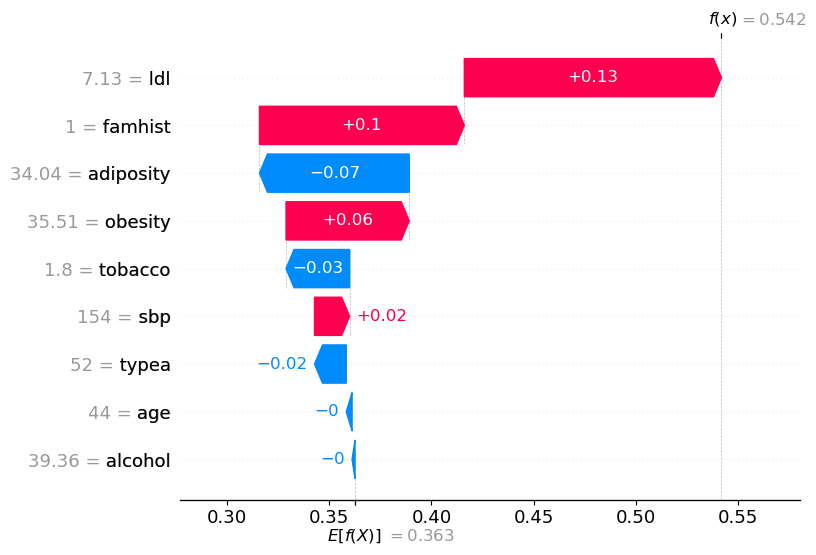

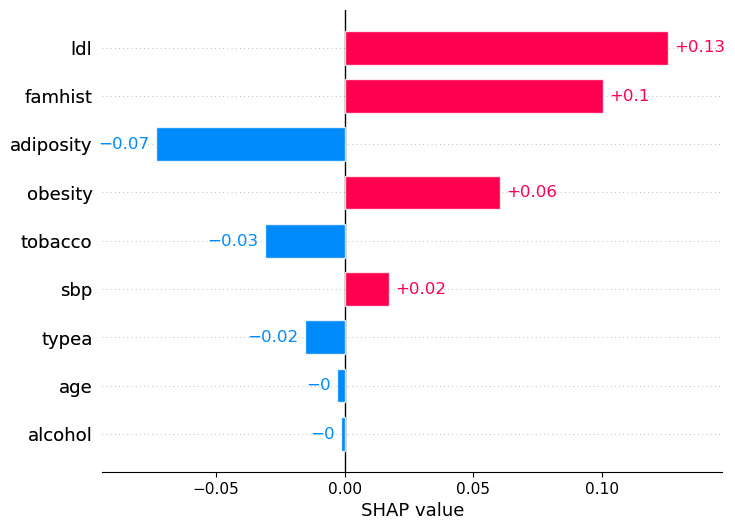

In [24]:
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values[0])

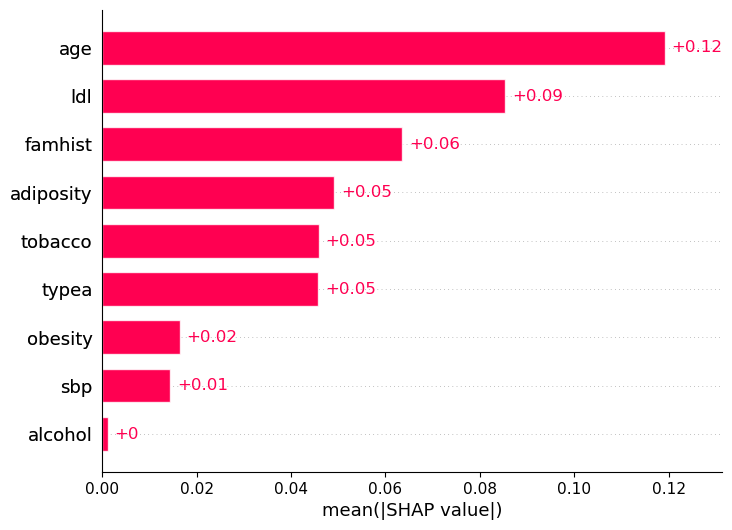

In [25]:
shap.plots.bar(shap_values)

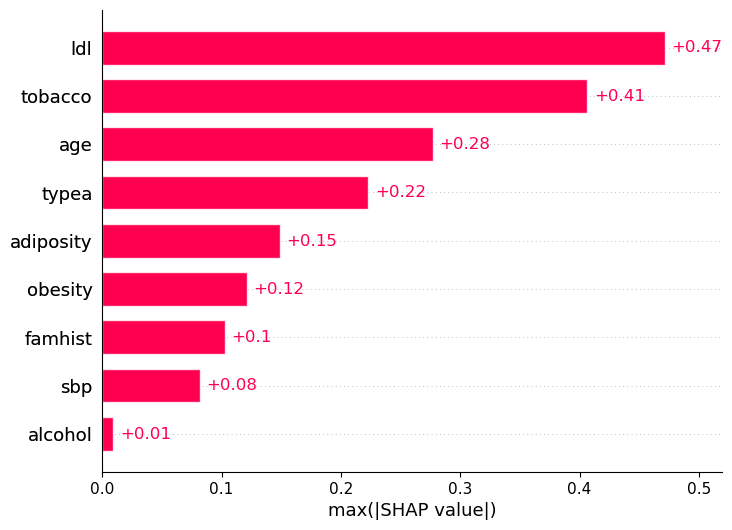

In [26]:
shap.plots.bar(shap_values.abs.max(0))

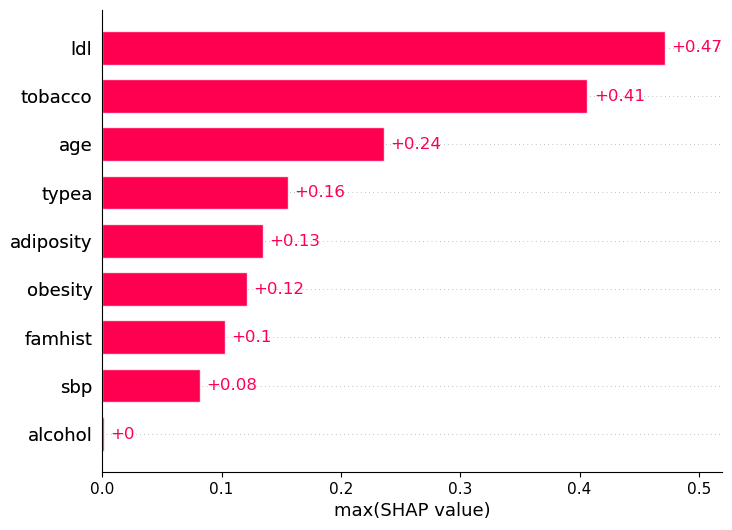

In [27]:
shap.plots.bar(shap_values.max(axis=0))

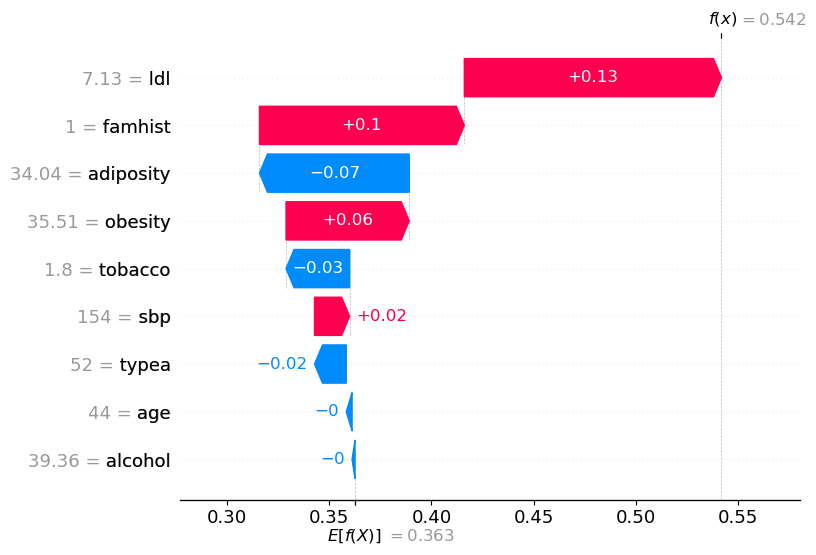

In [28]:
shap.plots.waterfall(shap_values[0])

In [29]:
shap.plots.force(shap_values[0])